<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

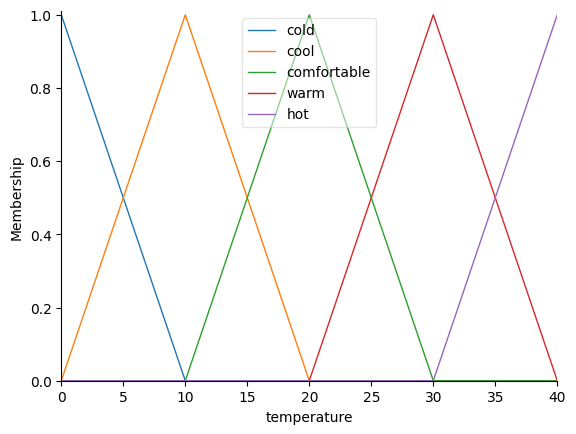

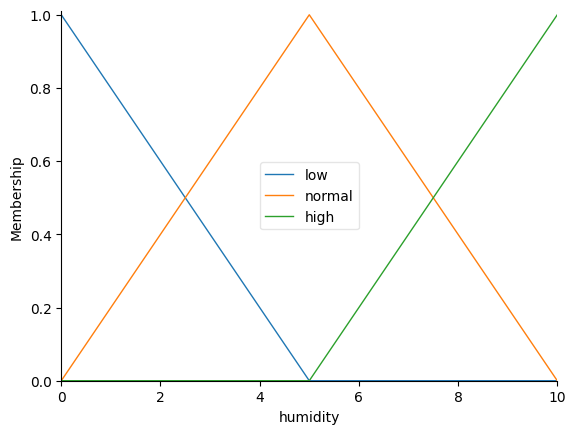

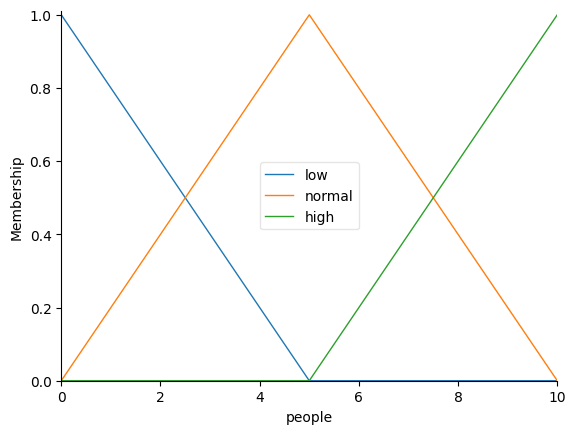

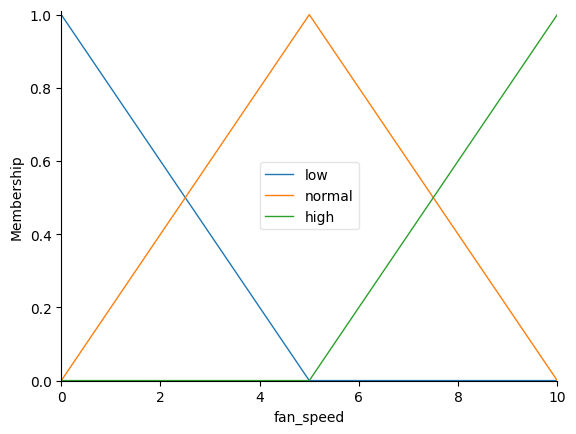

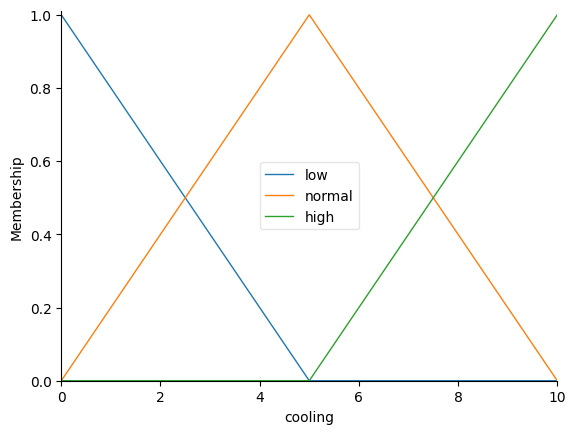

In [4]:
#2.5 maylanh dua tren nhiet do va do am
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature = ctrl.Antecedent(np.arange(0,40.1,0.1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,10.1,0.1),'humidity')
people=ctrl.Antecedent(np.arange(0,10.1,1),'people')
fan_speed = ctrl.Consequent(np.arange(0,10.1,0.1),'fan_speed')
cooling=ctrl.Consequent(np.arange(0,10.1,1),'cooling')
temperature['cold']=fuzz.trimf(temperature.universe,[0,0,10])
temperature['cool']=fuzz.trimf(temperature.universe,[0,10,20])
temperature['comfortable']=fuzz.trimf(temperature.universe,[10,20,30])
temperature['warm']=fuzz.trimf(temperature.universe,[20,30,40])
temperature['hot']=fuzz.trimf(temperature.universe,[30,40,40])
humidity['low']=fuzz.trimf(humidity.universe,[0,0,5])
humidity['normal']=fuzz.trimf(humidity.universe,[0,5,10])
humidity['high']=fuzz.trimf(humidity.universe,[5,10,10])
people['low']=fuzz.trimf(people.universe,[0,0,5])
people['normal']=fuzz.trimf(people.universe,[0,5,10])
people['high']=fuzz.trimf(people.universe,[5,10,10])
fan_speed['low']=fuzz.trimf(fan_speed.universe,[0,0,5])
fan_speed['normal']=fuzz.trimf(fan_speed.universe,[0,5,10])
fan_speed['high']=fuzz.trimf(fan_speed.universe,[5,10,10])
cooling['low']=fuzz.trimf(cooling.universe,[0,0,5])
cooling['normal']=fuzz.trimf(cooling.universe,[0,5,10])
cooling['high']=fuzz.trimf(cooling.universe,[5,10,10])
temperature.view()
humidity.view()
people.view()
fan_speed.view()
cooling.view()

Fan Speed: 1.6666666666666667
Cooling: 1.6666666666666665


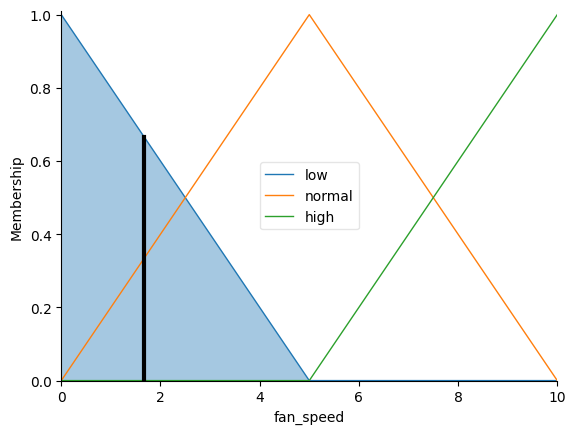

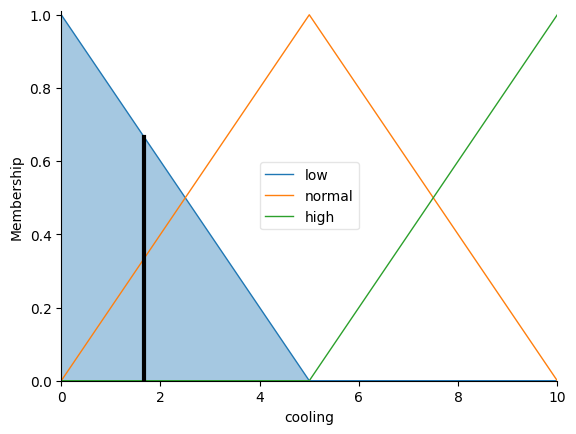

In [5]:
rule1=ctrl.Rule(temperature['cold'],fan_speed['low'])
rule2=ctrl.Rule(temperature['cool'],fan_speed['low'])
rule3=ctrl.Rule(temperature['comfortable'],fan_speed['normal'])
rule4=ctrl.Rule(temperature['warm'],fan_speed['high'])
rule5=ctrl.Rule(temperature['hot'],fan_speed['high'])
rule6=ctrl.Rule(temperature['cold'],cooling['low'])
rule7=ctrl.Rule(temperature['cool'],cooling['low'])
rule8=ctrl.Rule(temperature['comfortable'],cooling['normal'])
rule9=ctrl.Rule(temperature['warm'],cooling['high'])
rule10=ctrl.Rule(temperature['hot'],cooling['high'])
rule11=ctrl.Rule(humidity['normal'],fan_speed['normal'])
rule12=ctrl.Rule(humidity['high'],fan_speed['high'])
rule13=ctrl.Rule(people['low'],fan_speed['low'])
rule14=ctrl.Rule(people['normal'],fan_speed['normal'])
rule15=ctrl.Rule(people['high'],fan_speed['high'])
rule16=ctrl.Rule(temperature['hot']|humidity['high']|people['high'],(fan_speed['high'],cooling['high']))
rule17=ctrl.Rule(temperature['comfortable']|humidity['normal']|people['normal'],(fan_speed['normal'],cooling['normal']))
rule18=ctrl.Rule(temperature['cool']|humidity['low']|people['low'],(fan_speed['low'],cooling['low']))
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
control_sim=ctrl.ControlSystemSimulation(control_system)
control_sim.input['temperature']=0
control_sim.input['humidity']=0
control_sim.input['people']=0
control_sim.compute()
print(f"Fan Speed: {control_sim.output['fan_speed']}")
print(f"Cooling: {control_sim.output['cooling']}")
fan_speed.view(sim=control_sim)
cooling.view(sim=control_sim)